In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read the csv file
cf_sm = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/RecipeDB_CF_with_string_matching.csv', encoding='latin1')

In [3]:
mapped_cf = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Mapped/Recipedb_mapped_ing_CF_count.csv')

In [4]:
mapped_cf

,RecipeDB Ingredient,Sueatable Ingredient,Similarity,CF,Count
0,onion,ONION,1.000001,0.24,69096.0
1,butter,BUTTER,1.000000,9.90,54026.0
2,garlic clove,GARLIC,0.930919,0.67,49786.0
3,water,WATER,1.000000,0.49,49546.0
4,olive oil,OLIVE OIL,1.000000,3.84,44782.0
...,...,...,...,...,...
7748,dutch cocoa hershey,HAZELNUT CHOCOLATE,0.823729,3.43,2.0
7749,milk chocolate hershey,MILK CHOCOLATE,0.947778,3.60,2.0
7750,chocolate flavor crisp rice cereal,CHOCOLATE CREAM COOKY,0.818652,1.69,2.0
7751,chocolate ripple ice cream,CHOCOLATE CREAM COOKY,0.925916,1.69,2.0


find category for each ingredient using recipedb

In [5]:
cat = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeDB_ingredient_flavor.csv')

In [6]:
cat

,IngID,ingredient,frequency,generic_name,wikilink,wikiimage,FlavorDB_Category,Dietrx_Category,New_Category,Flavor_DB_Link,flavordb_id,Diet_rx_link
0,0,salt,48195,Salt,https://en.wikipedia.org/wiki/Salt,https://upload.wikimedia.org/wikipedia/commons...,NaN,Additive,NaN,Salt~https://cosylab.iiitd.edu.in/flavordb/ent...,778,NaN
1,1,onion,35453,Onion,https://en.wikipedia.org/wiki/Onion,https://upload.wikimedia.org/wikipedia/commons...,Vegetable-Bulb,Vegetable,NaN,Onion~https://cosylab.iiitd.edu.in/flavordb/en...,348,onion~https://cosylab.iiitd.edu.in/dietrx/get_...
2,2,butter,30038,Butter,https://en.wikipedia.org/wiki/Butter,https://upload.wikimedia.org/wikipedia/commons...,NaN,Dairy,NaN,Butter~https://cosylab.iiitd.edu.in/flavordb/e...,60,butter~https://cosylab.iiitd.edu.in/dietrx/get...
3,3,water,26790,Water,https://en.wikipedia.org/wiki/Fresh_Water,https://upload.wikimedia.org/wikipedia/commons...,NaN,Additive,Incorrect Ingredient,Water~https://cosylab.iiitd.edu.in/flavordb/en...,794,NaN
4,4,garlic clove,25636,Garlic,https://en.wikipedia.org/wiki/Garlic,https://upload.wikimedia.org/wikipedia/commons...,NaN,Herb,NaN,Garlic~https://cosylab.iiitd.edu.in/flavordb/e...,259,garlic~https://cosylab.iiitd.edu.in/dietrx/get...
...,...,...,...,...,...,...,...,...,...,...,...,...
19014,19797,zucchini squash,1,Zucchini,https://en.wikipedia.org/wiki/Zucchini,https://upload.wikimedia.org/wikipedia/commons...,NaN,Vegetable,NaN,Green zucchini~https://cosylab.iiitd.edu.in/fl...,968,tomato~https://cosylab.iiitd.edu.in/dietrx/get...
19015,19798,zucchini summer squash,1,Summer Squash,https://en.wikipedia.org/wiki/Summer_squash,https://upload.wikimedia.org/wikipedia/commons...,NaN,Fruit,NaN,Butternut squash~https://cosylab.iiitd.edu.in/...,526,NaN
19016,19799,zucchini tomato sauce,1,Tomato Sauce,NaN,NaN,Condiment-Sauce,Condiment,NaN,Sauce~https://cosylab.iiitd.edu.in/flavordb/en...,777,NaN
19017,19800,zwieback breadcrumb,1,Bread Crumb,https://en.wikipedia.org/wiki/Bread_crumbs,https://upload.wikimedia.org/wikipedia/commons...,NaN,Bakery,NaN,Bread~https://cosylab.iiitd.edu.in/flavordb/en...,2,NaN


In [7]:
cat = cat[['ingredient','generic_name','Dietrx_Category']]
# cat['ingredient'] = cat['ingredient'].str.title()
cat = cat.rename(columns={'ingredient':'RecipeDB Ingredient'})
cat

,RecipeDB Ingredient,generic_name,Dietrx_Category
0,salt,Salt,Additive
1,onion,Onion,Vegetable
2,butter,Butter,Dairy
3,water,Water,Additive
4,garlic clove,Garlic,Herb
...,...,...,...
19014,zucchini squash,Zucchini,Vegetable
19015,zucchini summer squash,Summer Squash,Fruit
19016,zucchini tomato sauce,Tomato Sauce,Condiment
19017,zwieback breadcrumb,Bread Crumb,Bakery


In [8]:
cat.to_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Category/Recipedb_ing_category.csv', index=False)

Take the count and cf value from df_cf only and take ingredient and category from cat.

In [9]:
cat_merge = pd.merge(mapped_cf, cat, on='RecipeDB Ingredient')
cat_merge = cat_merge.drop(['generic_name'], axis=1)
cat_merge = cat_merge.rename(columns={'Dietrx_Category':'Category'})
cat_merge


,RecipeDB Ingredient,Sueatable Ingredient,Similarity,CF,Count,Category
0,onion,ONION,1.000001,0.24,69096.0,Vegetable
1,butter,BUTTER,1.000000,9.90,54026.0,Dairy
2,garlic clove,GARLIC,0.930919,0.67,49786.0,Herb
3,water,WATER,1.000000,0.49,49546.0,Additive
4,olive oil,OLIVE OIL,1.000000,3.84,44782.0,Plant Derivative
...,...,...,...,...,...,...
7368,dutch cocoa hershey,HAZELNUT CHOCOLATE,0.823729,3.43,2.0,Plant
7369,milk chocolate hershey,MILK CHOCOLATE,0.947778,3.60,2.0,Beverage
7370,chocolate flavor crisp rice cereal,CHOCOLATE CREAM COOKY,0.818652,1.69,2.0,Cereal
7371,chocolate ripple ice cream,CHOCOLATE CREAM COOKY,0.925916,1.69,2.0,Dish


In [10]:
original_ingredients = mapped_cf['RecipeDB Ingredient'].tolist()
merged_ingredients = cat_merge['RecipeDB Ingredient'].tolist()

unmerged_ingredients = list(set(original_ingredients) - set(merged_ingredients))
len(unmerged_ingredients)


380

category v/s cf, no of ingredients, mean, std, min and max stats for each category

In [11]:
cat_cf_list=[]

for cate in cat_merge['Category'].unique():
    cat_cf = cat_merge[(cat_merge['Category']==cate)]['CF']
    ing_list = cat_merge[(cat_merge['Category']==cate)]['RecipeDB Ingredient']
    
    cat_data_dict = {
    'Category': cate,
    'CF_val': cat_cf.tolist(),
    'Ingredient Count': len(cat_cf.values.tolist()),
    'Ingredient': ing_list.tolist(),
    'Min CF':cat_cf.min(),
    'Max CF': cat_cf.max(),
    'Average CF': round(cat_cf.mean(),3),
    'Std': round(cat_cf.std(),3)
    }
    cat_cf_list.append(cat_data_dict)
    
# Create a DataFrame from the list of dictionaries
cat_cf_db = pd.DataFrame(cat_cf_list)

cat_cf_db
   

,Category,CF_val,Ingredient Count,Ingredient,Min CF,Max CF,Average CF,Std
0,Vegetable,"[0.24, 0.48, 0.23, 1.28, 0.73, 0.65, 0.48, 0.7...",464,"[onion, tomato, carrot, tomato paste, green pe...",0.15,18.01,1.178,1.968
1,Dairy,"[9.9, 5.34, 5.34, 8.65, 8.65, 8.65, 2.71, 8.65...",653,"[butter, milk, cream, parmesan cheese, cheddar...",0.22,18.85,6.827,3.624
2,Herb,"[0.67, 0.67, 0.73, 0.67, 0.32, 0.15, 0.23, 2.6...",105,"[garlic clove, garlic, green onion, garlic pow...",0.15,10.12,1.021,1.409
3,Additive,"[0.49, 0.89, 4.3, 0.69, 4.3, 1.43, 1.46, 0.67,...",401,"[water, sugar, cinnamon, vegetable oil, vanill...",0.11,17.94,2.448,2.644
4,Plant Derivative,"[3.84, 1.74, 1.02, 6.6, 0.74, 2.33, 0.99, 1.16...",355,"[olive oil, honey, red wine vinegar, chocolate...",0.33,17.94,2.637,2.187
5,Meat,"[3.23, 19.54, 3.25, 3.25, 3.25, 4.03, 3.19, 3....",1212,"[egg, beef, chicken broth, chicken breast, chi...",0.23,27.72,10.347,7.735
6,Spice,"[0.58, 0.58, 2.5, 0.88, 1.56, 0.15, 0.88, 0.24...",198,"[pepper, salt pepper, cumin, ginger, nutmeg, t...",0.15,19.54,2.677,4.113
7,Cereal,"[1.37, 1.37, 2.54, 0.88, 0.73, 0.97, 2.54, 1.2...",498,"[flour, purpose flour, rice, sesame seed, gree...",0.23,19.54,1.925,3.082
8,Beverage,"[0.22, 0.22, 1.78, 0.34, 1.03, 2.78, 0.34, 0.2...",239,"[lemon juice, lime juice, coconut, pineapple, ...",0.22,7.55,1.760,1.269
9,Condiment,"[1.62, 1.28, 2.04, 2.14, 0.58, 0.62, 0.96, 6.1...",157,"[soy sauce, tomato sauce, mayonnaise, fish sau...",0.24,19.54,2.229,2.984


In [12]:
cat_cf_db = cat_cf_db.sort_values('Ingredient Count', ascending=False)

# Merge some ingredient categories

In [ ]:
# merge all additive categories (4) into miscellaneous and seed to beverage caffenited

In [13]:
cat_modify = cat_merge.copy()

# additive yeast to miscellaneous
cat_modify.loc[cat_modify['RecipeDB Ingredient'] == 'Rapid Rise Yeast Bread Machine', 'Category'] = 'Miscellaneous'

# additive salt to miscellaneous
cat_modify.loc[cat_modify['RecipeDB Ingredient'] == 'Salt Water', 'Category'] = 'Miscellaneous'
cat_modify.loc[cat_modify['RecipeDB Ingredient'] == 'Garlic Sea Salt', 'Category'] = 'Miscellaneous'

# additive sugar to miscellaneous
cat_modify.loc[cat_modify['Category'] == 'Additive-Salt', 'Category'] = 'Miscellaneous'

# additive sugar to miscellaneous
cat_modify.loc[cat_modify['Category'] == 'Additive-Sugar', 'Category'] = 'Miscellaneous'

# additive to miscellaneous
cat_modify.loc[cat_modify['Category'] == 'Additive', 'Category'] = 'Miscellaneous'

# additive-vinegar to miscellaneous
cat_modify.loc[cat_modify['Category'] == 'Additive-Vinegar', 'Category'] = 'Miscellaneous'

# seed to beverage caffeinated
cat_modify.loc[cat_modify['Category'] == 'Seed', 'Category'] = 'Beverage-Caffeinated'

# rename Beverage Caffeinated to Beverage-Caffeinated
cat_modify.loc[cat_modify['Category'] == 'Beverage Caffeinated', 'Category'] = 'Beverage-Caffeinated'

#  rename category flower to Vegetable-Flower
cat_modify.loc[cat_modify['Category'] == 'Flower', 'Category'] = 'Vegetable-Flower'

#  chnage category plant to Plant Derivate
cat_modify.loc[cat_modify['Category'] == 'Plant', 'Category'] = 'Plant-Derivative'
cat_modify.loc[cat_modify['Category'] == 'Plant Derivative', 'Category'] = 'Plant-Derivative'

#  rename category Vegetable Fruit to Vegetable-Fruit
cat_modify.loc[cat_modify['Category'] == 'Vegetable Fruit', 'Category'] = 'Vegetable-Fruit'

cat_modify.loc[cat_modify['Category'] == 'Vegetable Tuber', 'Category'] = 'Vegetable-Tuber'

cat_modify.loc[cat_modify['Category'] == 'dish', 'Category'] = 'Dish'

cat_modify.loc[cat_modify['Category'] == 'Fungus', 'Category'] = 'Fungi'

cat_modify

,RecipeDB Ingredient,Sueatable Ingredient,Similarity,CF,Count,Category
0,onion,ONION,1.000001,0.24,69096.0,Vegetable
1,butter,BUTTER,1.000000,9.90,54026.0,Dairy
2,garlic clove,GARLIC,0.930919,0.67,49786.0,Herb
3,water,WATER,1.000000,0.49,49546.0,Miscellaneous
4,olive oil,OLIVE OIL,1.000000,3.84,44782.0,Plant-Derivative
...,...,...,...,...,...,...
7368,dutch cocoa hershey,HAZELNUT CHOCOLATE,0.823729,3.43,2.0,Plant-Derivative
7369,milk chocolate hershey,MILK CHOCOLATE,0.947778,3.60,2.0,Beverage
7370,chocolate flavor crisp rice cereal,CHOCOLATE CREAM COOKY,0.818652,1.69,2.0,Cereal
7371,chocolate ripple ice cream,CHOCOLATE CREAM COOKY,0.925916,1.69,2.0,Dish


find cf stats for each category with mean, std

In [14]:
category_cf =[]

for cate in cat_modify['Category'].unique():
    cat_cf = cat_modify[(cat_modify['Category']==cate)]['CF']
    ing_list = cat_modify[(cat_modify['Category']==cate)]['RecipeDB Ingredient']
    
    category_data_dict = {
    'Category': cate,
    'CF_val': cat_cf.tolist(),
    'Ingredient Count': len(cat_cf.values.tolist()),
    'Ingredient': ing_list.tolist(),
    'Min CF':cat_cf.min(),
    'Max CF': cat_cf.max(),
    'Average CF': round(cat_cf.mean(),3),
    'Std': round(cat_cf.std(),3)
    }
    category_cf.append(category_data_dict)
    
# Create a DataFrame from the list of dictionaries
category_cf_db = pd.DataFrame(category_cf)

category_cf_db
   

,Category,CF_val,Ingredient Count,Ingredient,Min CF,Max CF,Average CF,Std
0,Vegetable,"[0.24, 0.48, 0.23, 1.28, 0.73, 0.65, 0.48, 0.7...",464,"[onion, tomato, carrot, tomato paste, green pe...",0.15,18.01,1.178,1.968
1,Dairy,"[9.9, 5.34, 5.34, 8.65, 8.65, 8.65, 2.71, 8.65...",653,"[butter, milk, cream, parmesan cheese, cheddar...",0.22,18.85,6.827,3.624
2,Herb,"[0.67, 0.67, 0.73, 0.67, 0.32, 0.15, 0.23, 2.6...",105,"[garlic clove, garlic, green onion, garlic pow...",0.15,10.12,1.021,1.409
3,Miscellaneous,"[0.49, 0.89, 4.3, 0.69, 4.3, 1.43, 1.46, 2.54,...",439,"[water, sugar, cinnamon, vegetable oil, vanill...",0.11,17.94,2.447,2.626
4,Plant-Derivative,"[3.84, 1.74, 1.02, 2.9, 6.6, 0.59, 0.74, 0.59,...",491,"[olive oil, honey, red wine vinegar, peanut oi...",0.22,17.94,2.556,1.995
5,Meat,"[3.23, 19.54, 3.25, 3.25, 3.25, 4.03, 3.19, 3....",1212,"[egg, beef, chicken broth, chicken breast, chi...",0.23,27.72,10.347,7.735
6,Spice,"[0.58, 0.58, 2.5, 0.88, 1.56, 0.15, 0.88, 0.24...",198,"[pepper, salt pepper, cumin, ginger, nutmeg, t...",0.15,19.54,2.677,4.113
7,Cereal,"[1.37, 1.37, 2.54, 0.88, 0.73, 0.97, 2.54, 1.2...",498,"[flour, purpose flour, rice, sesame seed, gree...",0.23,19.54,1.925,3.082
8,Beverage,"[0.22, 0.22, 1.78, 0.34, 1.03, 2.78, 0.34, 0.2...",239,"[lemon juice, lime juice, coconut, pineapple, ...",0.22,7.55,1.760,1.269
9,Condiment,"[1.62, 1.28, 2.04, 2.14, 0.58, 0.62, 0.96, 6.1...",157,"[soy sauce, tomato sauce, mayonnaise, fish sau...",0.24,19.54,2.229,2.984


In [15]:
category_cf_db = category_cf_db.sort_values('Ingredient Count', ascending=False)
category_cf_db

,Category,CF_val,Ingredient Count,Ingredient,Min CF,Max CF,Average CF,Std
5,Meat,"[3.23, 19.54, 3.25, 3.25, 3.25, 4.03, 3.19, 3....",1212,"[egg, beef, chicken broth, chicken breast, chi...",0.23,27.72,10.347,7.735
11,Fruit,"[0.22, 0.66, 0.62, 0.22, 0.41, 0.22, 0.35, 0.3...",724,"[lemon, raisin, orange juice, lime, coconut mi...",0.22,18.85,1.340,1.677
1,Dairy,"[9.9, 5.34, 5.34, 8.65, 8.65, 8.65, 2.71, 8.65...",653,"[butter, milk, cream, parmesan cheese, cheddar...",0.22,18.85,6.827,3.624
7,Cereal,"[1.37, 1.37, 2.54, 0.88, 0.73, 0.97, 2.54, 1.2...",498,"[flour, purpose flour, rice, sesame seed, gree...",0.23,19.54,1.925,3.082
4,Plant-Derivative,"[3.84, 1.74, 1.02, 2.9, 6.6, 0.59, 0.74, 0.59,...",491,"[olive oil, honey, red wine vinegar, peanut oi...",0.22,17.94,2.556,1.995
22,Dish,"[0.69, 17.94, 0.51, 1.41, 1.02, 3.23, 8.65, 1....",465,"[vegetable broth, sausage, tortilla, tomato so...",0.11,27.72,5.620,6.473
0,Vegetable,"[0.24, 0.48, 0.23, 1.28, 0.73, 0.65, 0.48, 0.7...",464,"[onion, tomato, carrot, tomato paste, green pe...",0.15,18.01,1.178,1.968
20,Bakery,"[0.78, 1.33, 2.64, 0.78, 0.7, 0.78, 1.13, 0.78...",450,"[breadcrumb, flour tortilla, corn tortilla, br...",0.29,19.54,1.639,2.887
3,Miscellaneous,"[0.49, 0.89, 4.3, 0.69, 4.3, 1.43, 1.46, 2.54,...",439,"[water, sugar, cinnamon, vegetable oil, vanill...",0.11,17.94,2.447,2.626
8,Beverage,"[0.22, 0.22, 1.78, 0.34, 1.03, 2.78, 0.34, 0.2...",239,"[lemon juice, lime juice, coconut, pineapple, ...",0.22,7.55,1.760,1.269


In [16]:
category_cf_db.to_csv("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Category/Merged_Final_Category_CF_Ingcount.csv", index=False)

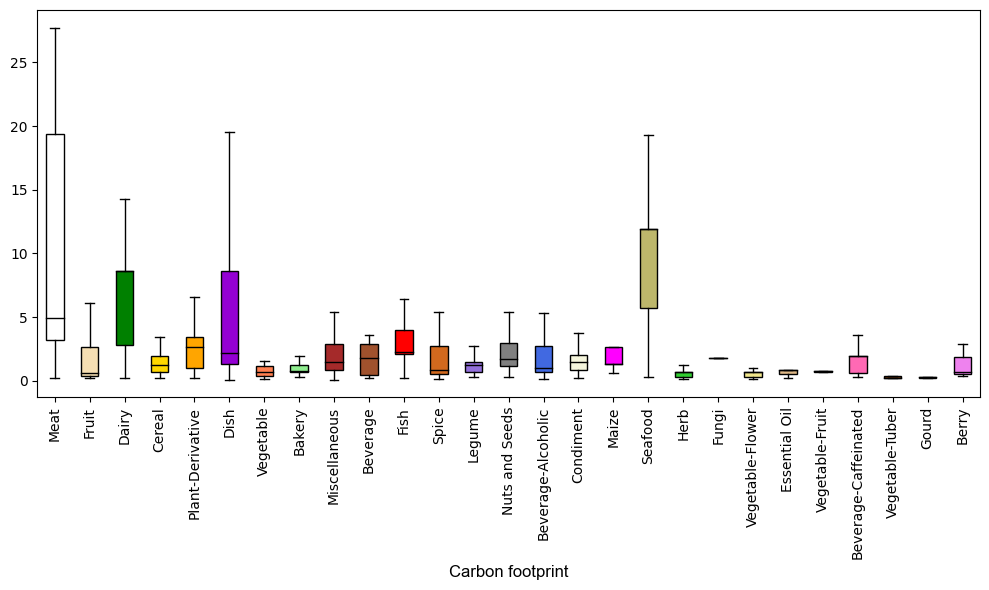

In [17]:
import matplotlib.pyplot as plt

colors = ['white', 'wheat', 'green', 'gold', 'orange', 'darkviolet', 'coral', 'lightgreen', 'brown', 'sienna', 'red', 'chocolate',
          'mediumpurple', 'gray', 'royalblue', 'beige', 'fuchsia', 'darkkhaki', 'limegreen', 'aqua', 'khaki',
          'burlywood', 'lime', 'hotpink', 'saddlebrown', 'paleturquoise', 'violet']

# Create the box plot
plt.figure(figsize=(10, 6))
bp = plt.boxplot(category_cf_db['CF_val'],
            labels=category_cf_db['Category'],
            # vert=False,  # make the boxplot horizontal
            patch_artist=True,  # fill with color
            boxprops=dict(facecolor='none', edgecolor='black'),  # box properties
            whiskerprops=dict(color='black'),  # whisker properties
            showfliers=False,  # remove outliers
            medianprops=dict(color='black', linewidth=1),  # median properties
            meanprops=dict(color='black', marker='o', markeredgecolor='black', markersize=5),  # mean properties
            capprops=dict(color='black'),
            whis=1.5)  # extend whiskers to min and max values

# Fill each box with a different color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i])

plt.xlabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()

# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Updated_Mansi/Plots/Category_CF.png", bbox_inches='tight', dpi=300)
# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Updated_Mansi/Plots/Category_CF.svg", dpi=300)

plt.show()


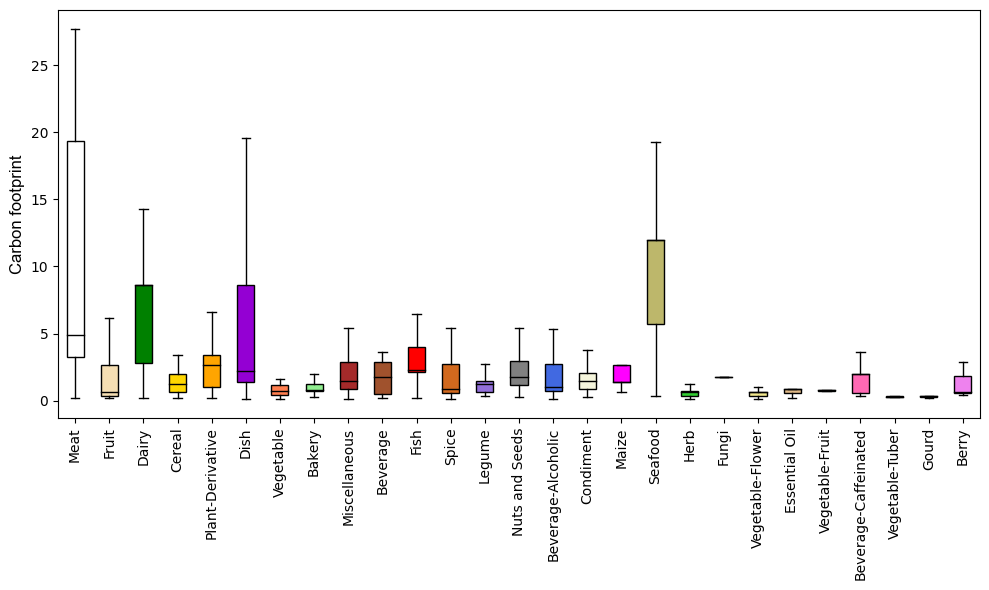

In [18]:
import matplotlib.pyplot as plt

colors = ['white', 'wheat', 'green', 'gold', 'orange', 'darkviolet', 'coral', 'lightgreen', 'brown', 'sienna', 'red', 'chocolate',
          'mediumpurple', 'gray', 'royalblue', 'beige', 'fuchsia', 'darkkhaki', 'limegreen', 'aqua', 'khaki',
          'burlywood', 'lime', 'hotpink', 'saddlebrown', 'paleturquoise', 'violet']

# Create the box plot
plt.figure(figsize=(10, 6))
bp = plt.boxplot(category_cf_db['CF_val'],
            labels=category_cf_db['Category'],
            patch_artist=True,  # fill with color
            boxprops=dict(facecolor='none', edgecolor='black'),  # box properties
            whiskerprops=dict(color='black'),  # whisker properties
            showfliers=False,  # remove outliers
            medianprops=dict(color='black', linewidth=1),  # median properties
            meanprops=dict(color='black', marker='o', markeredgecolor='black', markersize=5),  # mean properties
            capprops=dict(color='black'))

# Fill each box with a different color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i])
    
plt.ylabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()

# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Updated_Mansi/Plots/Category_CF.png", bbox_inches= 'tight', dpi=300)
# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Updated_Mansi/Plots/Category_CF.svg", dpi=300)

plt.show()


# Recipes and Category based on ingredients

for each recipe based on ingredient list write down the category

In [19]:
recipes = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/Cutoff_10_RecipeDB_CF_with_string_matching.csv', encoding='latin1')

In [20]:
recipes

,Recipe ID,Recipe Name,Recipe Ingredient,Total Ingredient,Available Ingredients,Available Count,Not Available Ingredients,Not Available Count,Available Percentage,Recipe_CF
0,2610,Egyptian Lentil Soup,"['black pepper', 'cumin', 'garlic', 'sea salt'...",10,"['cumin', 'garlic', 'carrot', 'coriander', 're...",8,"['black pepper', 'sea salt']",2,80.000000,5.56
1,2611,Egyptian Green Beans with Carrots,"['green bean carrot', 'vegetable oil', 'bay le...",9,"['green bean carrot', 'vegetable oil', 'garlic...",6,"['bay leaf', 'cardamom', 'salt black pepper']",3,66.666667,6.86
2,2612,Egyptian Bamia,"['okra', 'salt black pepper', 'lamb shoulder',...",7,"['okra', 'lamb shoulder', 'tomato sauce', 'wat...",6,['salt black pepper'],1,85.714286,32.06
3,2613,Magpie's Easy Falafel Cakes,"['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...",10,"['cornmeal', 'cumin', 'garlic', 'coriander', '...",8,"['sauce', 'salt']",2,80.000000,15.59
4,2614,Dukkah,"['black pepper', 'sea salt', 'cumin seed', 'co...",6,"['coriander seed', 'sesame seed', 'hazelnut']",3,"['black pepper', 'sea salt', 'cumin seed']",3,50.000000,2.27
...,...,...,...,...,...,...,...,...,...,...
117727,149187,Jerusalem Artichoke Stir Fry,"['yellow pepper', 'mushroom', 'garlic', 'jalap...",10,"['mushroom', 'garlic', 'celery', 'red pepper',...",5,"['yellow pepper', 'jalapeno pepper', 'vegetabl...",5,50.000000,4.15
117728,149188,Asian Apple Pear Compote,"['cardamom seed', 'asian pear', 'water', 'ging...",4,"['asian pear', 'water', 'ginger']",3,['cardamom seed'],1,75.000000,1.66
117729,149189,Skillet Sweet Potatoes,"['potato', 'pepper', 'vegetable stock', 'salt'...",6,"['potato', 'pepper', 'vegetable stock', 'onion...",5,['salt'],1,83.333333,5.60
117730,149190,Any-Flavour Cookies,"['baking powder', 'vanilla', 'flour', 'sugar',...",7,"['vanilla', 'flour', 'sugar', 'margarine', 'li...",5,"['baking powder', 'salt']",2,71.428571,8.48


In [21]:
cat_modify

,RecipeDB Ingredient,Sueatable Ingredient,Similarity,CF,Count,Category
0,onion,ONION,1.000001,0.24,69096.0,Vegetable
1,butter,BUTTER,1.000000,9.90,54026.0,Dairy
2,garlic clove,GARLIC,0.930919,0.67,49786.0,Herb
3,water,WATER,1.000000,0.49,49546.0,Miscellaneous
4,olive oil,OLIVE OIL,1.000000,3.84,44782.0,Plant-Derivative
...,...,...,...,...,...,...
7368,dutch cocoa hershey,HAZELNUT CHOCOLATE,0.823729,3.43,2.0,Plant-Derivative
7369,milk chocolate hershey,MILK CHOCOLATE,0.947778,3.60,2.0,Beverage
7370,chocolate flavor crisp rice cereal,CHOCOLATE CREAM COOKY,0.818652,1.69,2.0,Cereal
7371,chocolate ripple ice cream,CHOCOLATE CREAM COOKY,0.925916,1.69,2.0,Dish


for each ava ing after string match, map it to cat_modify['Ingredeint'] and find the category of ing for each recipe. Create a list and append to recipes df.

In [22]:
import ast
import operator

recipes['Ingredient_Category'] = ''

# Lowercase the ingredient column in cat_modify
cat_modify['Ingredient'] = cat_modify['RecipeDB Ingredient'].str.lower()

for i in range(len(recipes)):
    available = recipes['Available Ingredients'][i]
    available_list = ast.literal_eval(available)
    ingredient_categories = []
    
    for ingredient in available_list:
        ingredient_lower = ingredient.lower()  # Lowercase the ingredient
        category = cat_modify[cat_modify['RecipeDB Ingredient'] == ingredient_lower]['Category'].values
        if len(category) > 0:
            ingredient_categories.append(category[0])
    
    recipes.at[i, 'Ingredient_Category'] = ingredient_categories

recipes


,Recipe ID,Recipe Name,Recipe Ingredient,Total Ingredient,Available Ingredients,Available Count,Not Available Ingredients,Not Available Count,Available Percentage,Recipe_CF,Ingredient_Category
0,2610,Egyptian Lentil Soup,"['black pepper', 'cumin', 'garlic', 'sea salt'...",10,"['cumin', 'garlic', 'carrot', 'coriander', 're...",8,"['black pepper', 'sea salt']",2,80.000000,5.56,"[Spice, Herb, Vegetable, Herb, Legume, Miscell..."
1,2611,Egyptian Green Beans with Carrots,"['green bean carrot', 'vegetable oil', 'bay le...",9,"['green bean carrot', 'vegetable oil', 'garlic...",6,"['bay leaf', 'cardamom', 'salt black pepper']",3,66.666667,6.86,"[Legume, Miscellaneous, Herb, Vegetable, Veget..."
2,2612,Egyptian Bamia,"['okra', 'salt black pepper', 'lamb shoulder',...",7,"['okra', 'lamb shoulder', 'tomato sauce', 'wat...",6,['salt black pepper'],1,85.714286,32.06,"[Vegetable, Meat, Condiment, Miscellaneous, Ve..."
3,2613,Magpie's Easy Falafel Cakes,"['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...",10,"['cornmeal', 'cumin', 'garlic', 'coriander', '...",8,"['sauce', 'salt']",2,80.000000,15.59,"[Maize, Spice, Herb, Herb, Legume, Vegetable, ..."
4,2614,Dukkah,"['black pepper', 'sea salt', 'cumin seed', 'co...",6,"['coriander seed', 'sesame seed', 'hazelnut']",3,"['black pepper', 'sea salt', 'cumin seed']",3,50.000000,2.27,"[Herb, Cereal, Nuts and Seeds]"
...,...,...,...,...,...,...,...,...,...,...,...
117727,149187,Jerusalem Artichoke Stir Fry,"['yellow pepper', 'mushroom', 'garlic', 'jalap...",10,"['mushroom', 'garlic', 'celery', 'red pepper',...",5,"['yellow pepper', 'jalapeno pepper', 'vegetabl...",5,50.000000,4.15,"[Fungi, Herb, Herb, Vegetable-Fruit, Spice]"
117728,149188,Asian Apple Pear Compote,"['cardamom seed', 'asian pear', 'water', 'ging...",4,"['asian pear', 'water', 'ginger']",3,['cardamom seed'],1,75.000000,1.66,"[Fruit, Miscellaneous, Spice]"
117729,149189,Skillet Sweet Potatoes,"['potato', 'pepper', 'vegetable stock', 'salt'...",6,"['potato', 'pepper', 'vegetable stock', 'onion...",5,['salt'],1,83.333333,5.60,"[Vegetable-Tuber, Spice, Vegetable, Vegetable,..."
117730,149190,Any-Flavour Cookies,"['baking powder', 'vanilla', 'flour', 'sugar',...",7,"['vanilla', 'flour', 'sugar', 'margarine', 'li...",5,"['baking powder', 'salt']",2,71.428571,8.48,"[Legume, Cereal, Miscellaneous, Miscellaneous]"


In [23]:
recipes.to_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Category/Recipes_Category.csv', index=False)

In [24]:
recipe_cat = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Category/Recipes_Category.csv')

In [25]:
recipe_cat

,Recipe ID,Recipe Name,Recipe Ingredient,Total Ingredient,Available Ingredients,Available Count,Not Available Ingredients,Not Available Count,Available Percentage,Recipe_CF,Ingredient_Category
0,2610,Egyptian Lentil Soup,"['black pepper', 'cumin', 'garlic', 'sea salt'...",10,"['cumin', 'garlic', 'carrot', 'coriander', 're...",8,"['black pepper', 'sea salt']",2,80.000000,5.56,"['Spice', 'Herb', 'Vegetable', 'Herb', 'Legume..."
1,2611,Egyptian Green Beans with Carrots,"['green bean carrot', 'vegetable oil', 'bay le...",9,"['green bean carrot', 'vegetable oil', 'garlic...",6,"['bay leaf', 'cardamom', 'salt black pepper']",3,66.666667,6.86,"['Legume', 'Miscellaneous', 'Herb', 'Vegetable..."
2,2612,Egyptian Bamia,"['okra', 'salt black pepper', 'lamb shoulder',...",7,"['okra', 'lamb shoulder', 'tomato sauce', 'wat...",6,['salt black pepper'],1,85.714286,32.06,"['Vegetable', 'Meat', 'Condiment', 'Miscellane..."
3,2613,Magpie's Easy Falafel Cakes,"['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...",10,"['cornmeal', 'cumin', 'garlic', 'coriander', '...",8,"['sauce', 'salt']",2,80.000000,15.59,"['Maize', 'Spice', 'Herb', 'Herb', 'Legume', '..."
4,2614,Dukkah,"['black pepper', 'sea salt', 'cumin seed', 'co...",6,"['coriander seed', 'sesame seed', 'hazelnut']",3,"['black pepper', 'sea salt', 'cumin seed']",3,50.000000,2.27,"['Herb', 'Cereal', 'Nuts and Seeds']"
...,...,...,...,...,...,...,...,...,...,...,...
117727,149187,Jerusalem Artichoke Stir Fry,"['yellow pepper', 'mushroom', 'garlic', 'jalap...",10,"['mushroom', 'garlic', 'celery', 'red pepper',...",5,"['yellow pepper', 'jalapeno pepper', 'vegetabl...",5,50.000000,4.15,"['Fungi', 'Herb', 'Herb', 'Vegetable-Fruit', '..."
117728,149188,Asian Apple Pear Compote,"['cardamom seed', 'asian pear', 'water', 'ging...",4,"['asian pear', 'water', 'ginger']",3,['cardamom seed'],1,75.000000,1.66,"['Fruit', 'Miscellaneous', 'Spice']"
117729,149189,Skillet Sweet Potatoes,"['potato', 'pepper', 'vegetable stock', 'salt'...",6,"['potato', 'pepper', 'vegetable stock', 'onion...",5,['salt'],1,83.333333,5.60,"['Vegetable-Tuber', 'Spice', 'Vegetable', 'Veg..."
117730,149190,Any-Flavour Cookies,"['baking powder', 'vanilla', 'flour', 'sugar',...",7,"['vanilla', 'flour', 'sugar', 'margarine', 'li...",5,"['baking powder', 'salt']",2,71.428571,8.48,"['Legume', 'Cereal', 'Miscellaneous', 'Miscell..."


In [26]:
from collections import Counter
import ast

# Create a list to store the categories
category_count = []

# Iterate over the recipes dataset
for i in range(len(recipe_cat)):
    category_count.extend(ast.literal_eval(recipe_cat['Ingredient_Category'][i]))

# Count the occurrence of each category
category_freq = Counter(category_count)

# Create a DataFrame of category frequencies
category_frequency_df = pd.DataFrame.from_dict(category_freq, orient='index', columns=['Frequency'])
category_frequency_df.index.name = 'Category'
category_frequency_df = category_frequency_df.reset_index()

category_frequency_df = category_frequency_df.sort_values('Frequency', ascending=False)

category_frequency_df


,Category,Frequency
2,Vegetable,102677
9,Dairy,90384
5,Meat,84083
4,Miscellaneous,83002
1,Herb,70439
0,Spice,57848
10,Cereal,41680
12,Fruit,40011
7,Plant-Derivative,39897
13,Beverage,21991


category, occurence of cat in recipes, number of uniq ingre in each category, min, max, mean and std cf values based on ingredient for each category

In [27]:
category_freq_cf = pd.merge(category_frequency_df, category_cf_db, on='Category')
category_freq_cf

,Category,Frequency,CF_val,Ingredient Count,Ingredient,Min CF,Max CF,Average CF,Std
0,Vegetable,102677,"[0.24, 0.48, 0.23, 1.28, 0.73, 0.65, 0.48, 0.7...",464,"[onion, tomato, carrot, tomato paste, green pe...",0.15,18.01,1.178,1.968
1,Dairy,90384,"[9.9, 5.34, 5.34, 8.65, 8.65, 8.65, 2.71, 8.65...",653,"[butter, milk, cream, parmesan cheese, cheddar...",0.22,18.85,6.827,3.624
2,Meat,84083,"[3.23, 19.54, 3.25, 3.25, 3.25, 4.03, 3.19, 3....",1212,"[egg, beef, chicken broth, chicken breast, chi...",0.23,27.72,10.347,7.735
3,Miscellaneous,83002,"[0.49, 0.89, 4.3, 0.69, 4.3, 1.43, 1.46, 2.54,...",439,"[water, sugar, cinnamon, vegetable oil, vanill...",0.11,17.94,2.447,2.626
4,Herb,70439,"[0.67, 0.67, 0.73, 0.67, 0.32, 0.15, 0.23, 2.6...",105,"[garlic clove, garlic, green onion, garlic pow...",0.15,10.12,1.021,1.409
5,Spice,57848,"[0.58, 0.58, 2.5, 0.88, 1.56, 0.15, 0.88, 0.24...",198,"[pepper, salt pepper, cumin, ginger, nutmeg, t...",0.15,19.54,2.677,4.113
6,Cereal,41680,"[1.37, 1.37, 2.54, 0.88, 0.73, 0.97, 2.54, 1.2...",498,"[flour, purpose flour, rice, sesame seed, gree...",0.23,19.54,1.925,3.082
7,Fruit,40011,"[0.22, 0.66, 0.62, 0.22, 0.41, 0.22, 0.35, 0.3...",724,"[lemon, raisin, orange juice, lime, coconut mi...",0.22,18.85,1.340,1.677
8,Plant-Derivative,39897,"[3.84, 1.74, 1.02, 2.9, 6.6, 0.59, 0.74, 0.59,...",491,"[olive oil, honey, red wine vinegar, peanut oi...",0.22,17.94,2.556,1.995
9,Beverage,21991,"[0.22, 0.22, 1.78, 0.34, 1.03, 2.78, 0.34, 0.2...",239,"[lemon juice, lime juice, coconut, pineapple, ...",0.22,7.55,1.760,1.269


sorted based on freq of category

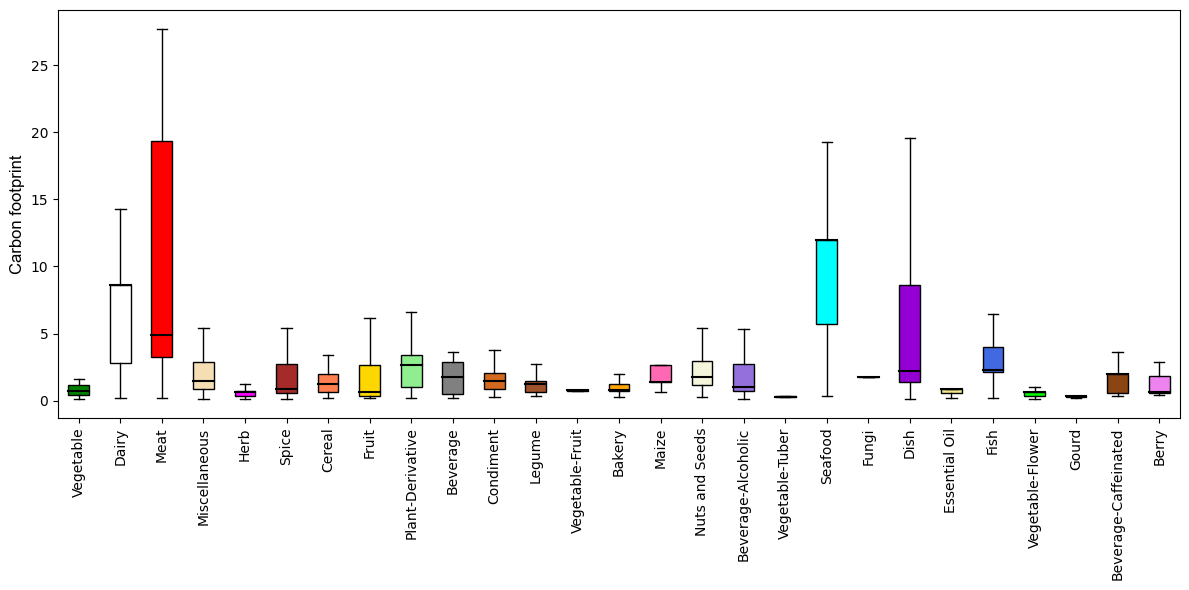

In [28]:
import matplotlib.pyplot as plt

colors = ['green', 'white', 'red', 'wheat', 'fuchsia', 'brown', 'coral', 'gold',
          'lightgreen',  'gray',  'chocolate', 'sienna', 'limegreen', 'orange', 'hotpink',
          'beige',  'mediumpurple', 'burlywood', 'aqua', 'darkkhaki',  'darkviolet', 'khaki', 
          'royalblue', 'lime', 'paleturquoise', 'saddlebrown',  'violet']

# Create the box plot
plt.figure(figsize=(12, 6))
bp = plt.boxplot(category_freq_cf['CF_val'],
            labels=category_freq_cf['Category'],
            patch_artist=True,  # fill with color
            boxprops=dict(facecolor='none', edgecolor='black'),  # box properties
            whiskerprops=dict(color='black'),  # whisker properties
            showfliers=False,  # remove outliers
            medianprops=dict(color='black', linewidth=1.5),  # median properties
            # meanprops=dict(color='black', marker='o', markeredgecolor='black', markersize=5),  # mean properties
            capprops=dict(color='black'))

# Fill each box with a different color
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i])
    
plt.ylabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Category_analysis/Category_CF_freq_sorted.jpeg", bbox_inches= 'tight', dpi=300)
# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Updated_Mansi/Plots/Category_CF.svg", dpi=300)

plt.show()


bubble represents mean cf of each category and size represent frequency

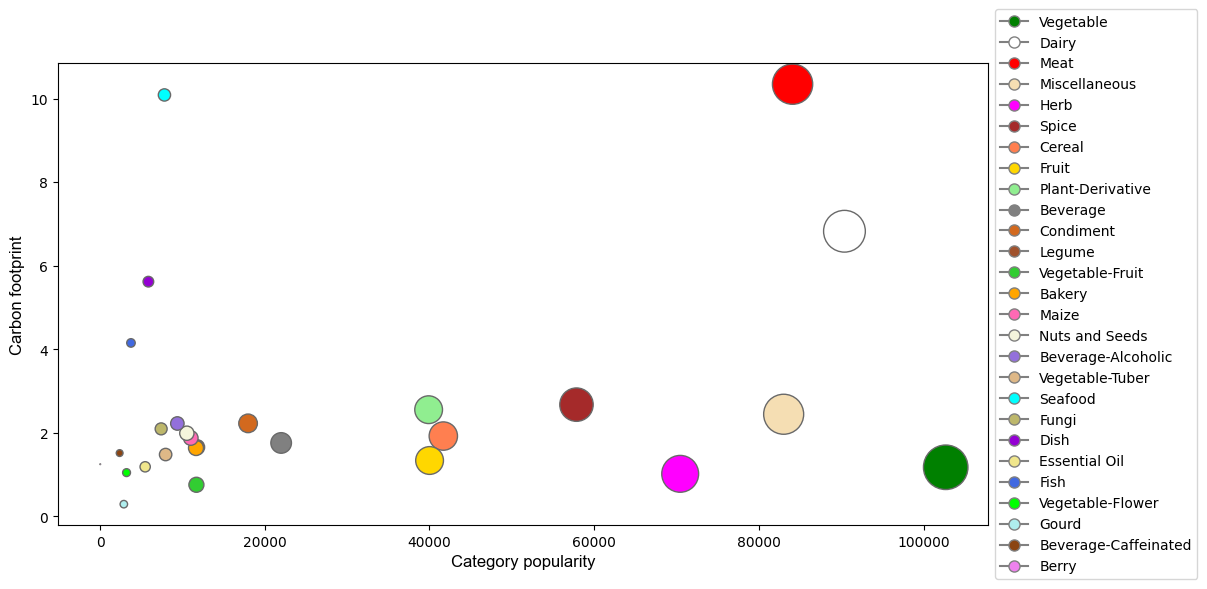

In [29]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['green', 'white', 'red', 'wheat', 'fuchsia', 'brown', 'coral', 'gold',
          'lightgreen',  'gray',  'chocolate', 'sienna', 'limegreen', 'orange', 'hotpink',
          'beige',  'mediumpurple', 'burlywood', 'aqua', 'darkkhaki',  'darkviolet', 'khaki', 
          'royalblue', 'lime', 'paleturquoise', 'saddlebrown',  'violet']

# Calculate the size of the circles based on frequency
bubble_sizes = category_freq_cf['Frequency'] * 0.01

plt.figure(figsize=(12, 6))

# Create the scatter plot with borders
scatter = plt.scatter(category_freq_cf['Frequency'], 
                      category_freq_cf['Average CF'], s=bubble_sizes, 
                      c=category_freq_cf['Category'].map(dict(zip(category_freq_cf['Category'].unique(), colors))), 
                      alpha=1, edgecolor='dimgrey', linewidths=1)

# Create a legend for the categories and shift it outside the box
legend_elements = [plt.Line2D([0], [0], marker='o', color='grey', label=category, 
                              markerfacecolor=color, markersize=8) for category, color in zip(category_freq_cf['Category'].unique(), colors)]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.xlabel('Category popularity', fontsize=12, fontname="Arial")
plt.ylabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


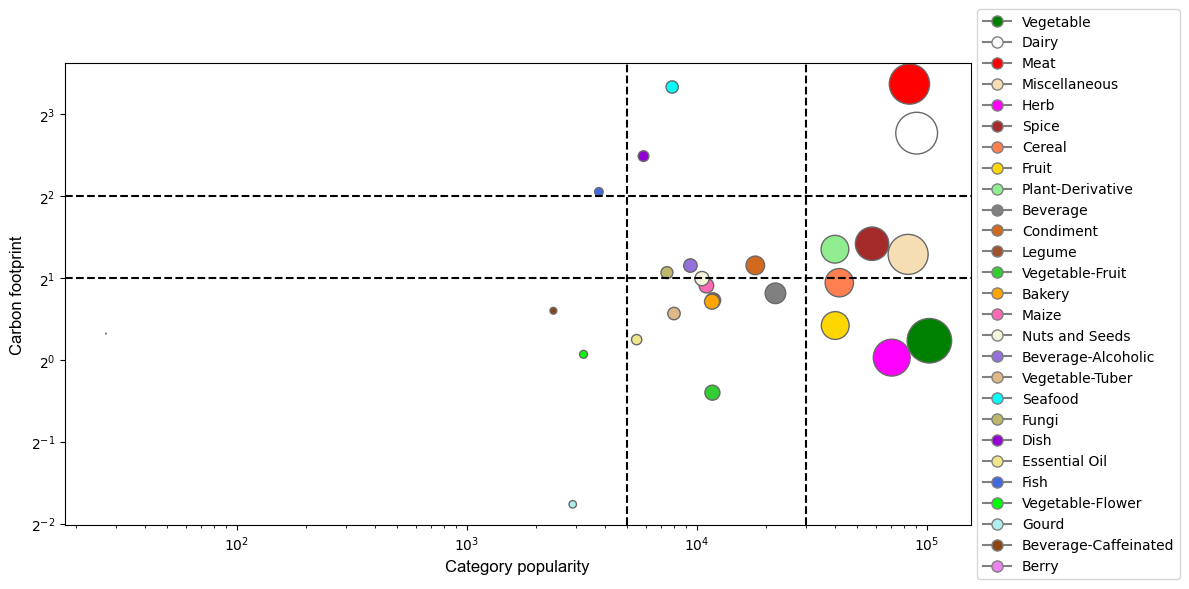

In [30]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['green', 'white', 'red', 'wheat', 'fuchsia', 'brown', 'coral', 'gold',
          'lightgreen',  'gray',  'chocolate', 'sienna', 'limegreen', 'orange', 'hotpink',
          'beige',  'mediumpurple', 'burlywood', 'aqua', 'darkkhaki',  'darkviolet', 'khaki', 
          'royalblue', 'lime', 'paleturquoise', 'saddlebrown',  'violet']

# Calculate the size of the circles based on frequency
bubble_sizes = category_freq_cf['Frequency'] * 0.01

# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 6))

# Create the scatter plot with borders
scatter = plt.scatter(category_freq_cf['Frequency'], 
                      category_freq_cf['Average CF'], s=bubble_sizes, 
                      c=category_freq_cf['Category'].map(dict(zip(category_freq_cf['Category'].unique(), colors))), 
                      alpha=1, edgecolor='dimgrey', linewidths=1)

# Create a legend for the categories and shift it outside the box
legend_elements = [plt.Line2D([0], [0], marker='o', color='grey', label=category, 
                              markerfacecolor=color, markersize=8) for category, color in zip(category_freq_cf['Category'].unique(), colors)]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Add vertical lines on specific x-axis ticks
xticks_to_highlight = [5000, 30000] 

yticks_to_highlight = [2, 4] 

for xtick in xticks_to_highlight:
    ax.axvline(x=xtick, color='black', linestyle='--', linewidth=1.5)
    
for ytick in yticks_to_highlight:
    ax.axhline(y=ytick, color='black', linestyle='--', linewidth=1.5)
    
plt.xlabel('Category popularity', fontsize=12, fontname="Arial")
plt.ylabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xscale('log', base=10)
plt.yscale('log', base=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Category_analysis/CategoryPopularity_CF.png", bbox_inches= 'tight', dpi=300)

plt.show()


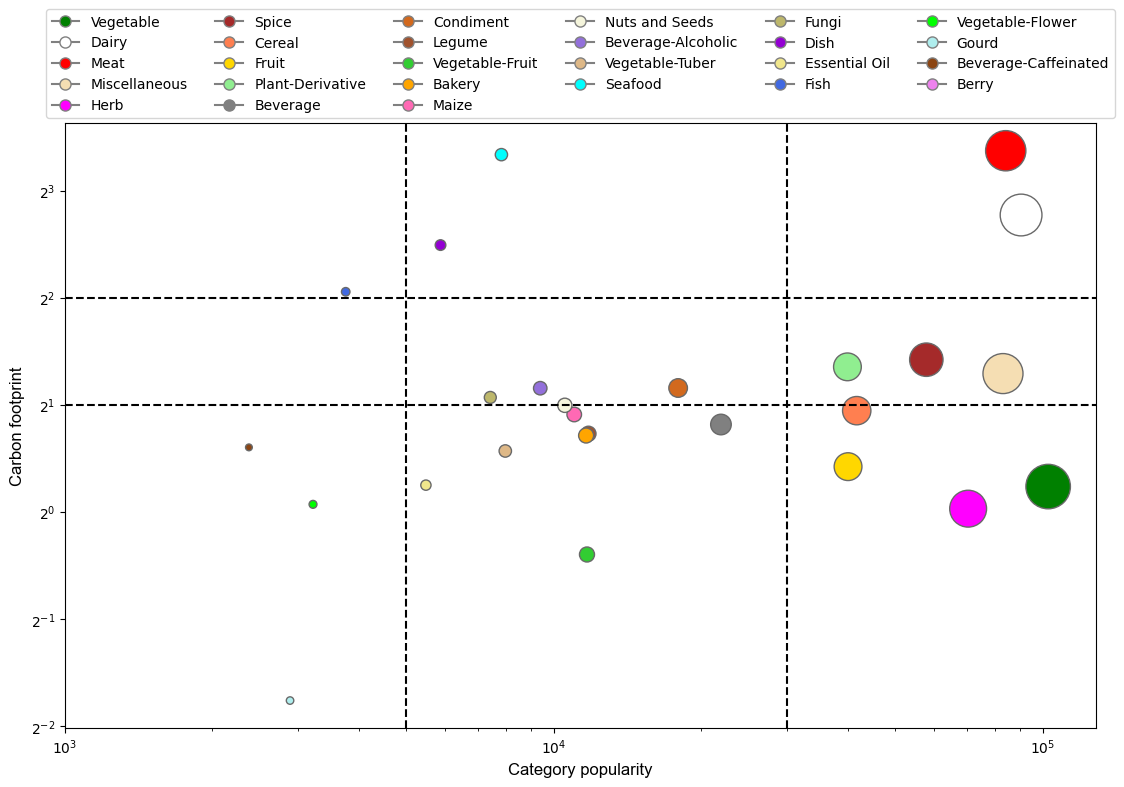

In [33]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['green', 'white', 'red', 'wheat', 'fuchsia', 'brown', 'coral', 'gold',
          'lightgreen',  'gray',  'chocolate', 'sienna', 'limegreen', 'orange', 'hotpink',
          'beige',  'mediumpurple', 'burlywood', 'aqua', 'darkkhaki',  'darkviolet', 'khaki', 
          'royalblue', 'lime', 'paleturquoise', 'saddlebrown',  'violet']

# Calculate the size of the circles based on frequency
bubble_sizes = category_freq_cf['Frequency'] * 0.01

# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot with borders
scatter = plt.scatter(category_freq_cf['Frequency'], 
                      category_freq_cf['Average CF'], s=bubble_sizes, 
                      c=category_freq_cf['Category'].map(dict(zip(category_freq_cf['Category'].unique(), colors))), 
                      alpha=1, edgecolor='dimgrey', linewidths=1)

# Create a legend for the categories and shift it outside the box
legend_elements = [plt.Line2D([0], [0], marker='o', color='grey', label=category, 
                              markerfacecolor=color, markersize=8) for category, color in zip(category_freq_cf['Category'].unique(), colors)]
# plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Add vertical lines on specific x-axis ticks
xticks_to_highlight = [5000, 30000] 

yticks_to_highlight = [2, 4] 

for xtick in xticks_to_highlight:
    ax.axvline(x=xtick, color='black', linestyle='--', linewidth=1.5)
    
for ytick in yticks_to_highlight:
    ax.axhline(y=ytick, color='black', linestyle='--', linewidth=1.5)
    
plt.xlabel('Category popularity', fontsize=12, fontname="Arial")
plt.ylabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xscale('log', base=10)
plt.yscale('log', base=2)
plt.xlim(1000, 128628)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Category_analysis/CategoryPopularity_CF_quad_toplegend.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()


# Category sorted based on CF

In [34]:
category_freq_cf_sortcf = category_freq_cf.sort_values('Average CF', ascending=False)
category_freq_cf_sortcf

,Category,Frequency,CF_val,Ingredient Count,Ingredient,Min CF,Max CF,Average CF,Std
2,Meat,84083,"[3.23, 19.54, 3.25, 3.25, 3.25, 4.03, 3.19, 3....",1212,"[egg, beef, chicken broth, chicken breast, chi...",0.23,27.72,10.347,7.735
18,Seafood,7820,"[10.12, 11.95, 0.94, 11.95, 0.94, 0.7, 5.4, 3....",108,"[shallot, shrimp, mussel, prawn, clam, scallop...",0.32,19.30,10.089,5.598
1,Dairy,90384,"[9.9, 5.34, 5.34, 8.65, 8.65, 8.65, 2.71, 8.65...",653,"[butter, milk, cream, parmesan cheese, cheddar...",0.22,18.85,6.827,3.624
20,Dish,5870,"[0.69, 17.94, 0.51, 1.41, 1.02, 3.23, 8.65, 1....",465,"[vegetable broth, sausage, tortilla, tomato so...",0.11,27.72,5.620,6.473
22,Fish,3756,"[3.8, 3.8, 0.81, 4.68, 0.81, 2.26, 2.26, 2.14,...",223,"[salmon fillet, salmon, anchovy fillet, tuna, ...",0.22,19.54,4.154,4.202
5,Spice,57848,"[0.58, 0.58, 2.5, 0.88, 1.56, 0.15, 0.88, 0.24...",198,"[pepper, salt pepper, cumin, ginger, nutmeg, t...",0.15,19.54,2.677,4.113
8,Plant-Derivative,39897,"[3.84, 1.74, 1.02, 2.9, 6.6, 0.59, 0.74, 0.59,...",491,"[olive oil, honey, red wine vinegar, peanut oi...",0.22,17.94,2.556,1.995
3,Miscellaneous,83002,"[0.49, 0.89, 4.3, 0.69, 4.3, 1.43, 1.46, 2.54,...",439,"[water, sugar, cinnamon, vegetable oil, vanill...",0.11,17.94,2.447,2.626
10,Condiment,17975,"[1.62, 1.28, 2.04, 2.14, 0.58, 0.62, 0.96, 6.1...",157,"[soy sauce, tomato sauce, mayonnaise, fish sau...",0.24,19.54,2.229,2.984
16,Beverage-Alcoholic,9389,"[0.74, 1.02, 2.5, 1.74, 2.54, 0.74, 2.84, 7.55...",158,"[white wine, red wine, mirin, sake, rice wine,...",0.15,18.85,2.226,3.227


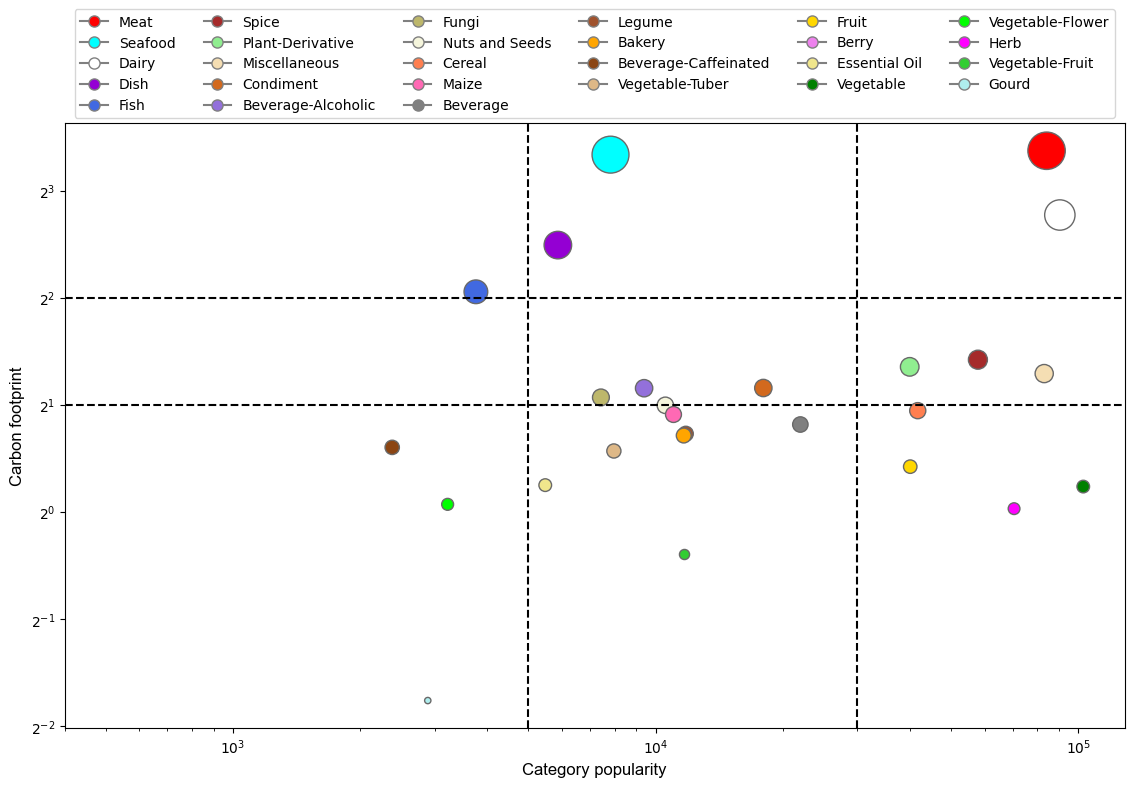

In [35]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['red', 'aqua', 'white', 'darkviolet', 'royalblue', 'brown', 'lightgreen', 'wheat', 'chocolate', 'mediumpurple',
          'darkkhaki', 'beige', 'coral', 'hotpink', 'gray', 'sienna', 'orange', 'saddlebrown', 'burlywood', 'gold',
          'violet', 'khaki', 'green', 'lime', 'fuchsia', 'limegreen',  'paleturquoise']
            

# Calculate the size of the circles basedcf on frequency
bubble_sizes = category_freq_cf_sortcf['Average CF']*70
# bubble_sizes = 1.9 ** (category_freq_cf['Average CF'])

# plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot with borders
scatter = plt.scatter(category_freq_cf_sortcf['Frequency'], 
                      category_freq_cf_sortcf['Average CF'], s=bubble_sizes, 
                      c=category_freq_cf_sortcf['Category'].map(dict(zip(category_freq_cf_sortcf['Category'].unique(), colors))), 
                      alpha=1, edgecolor='dimgrey', linewidths=1)

# Create a legend for the categories and shift it outside the box
legend_elements = [plt.Line2D([0], [0], marker='o', color='grey', label=category, 
                              markerfacecolor=color, markersize=8) for category, color in zip(category_freq_cf_sortcf['Category'].unique(), colors)]
# plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=6, fontsize=10)

# Add vertical lines on specific x-axis ticks
xticks_to_highlight = [5000, 30000] 

yticks_to_highlight = [2, 4] 

for xtick in xticks_to_highlight:
    ax.axvline(x=xtick, color='black', linestyle='--', linewidth=1.5)
    
for ytick in yticks_to_highlight:
    ax.axhline(y=ytick, color='black', linestyle='--', linewidth=1.5)
    
plt.xlabel('Category popularity', fontsize=12, fontname="Arial")
plt.ylabel('Carbon footprint', fontsize=12, fontname="Arial")
plt.xscale('log', base=10)
plt.yscale('log', base=2)
plt.xlim(400, 128628)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Category_analysis/CategoryPopularity_CFsorted_toplegend.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()
